# IRIS 분류 문제

- 분류 문제에서 클래스(0, 1, 2) 오차(ERROR)에 편향이 생길 수 있다.

	- \#0 class를 0으로 예측하면 오차는 0 </br>
	- \#1 class를 0으로 예측하면 오차는 1 </br>
	- \#2 class를 0으로 예측하면 오차는 2 </br>

	- 틀린 것은 동일한데 오차값이 1과 2로 편중될 수 있다. <br></br>

- 이럴 때 class를 __One Hot Encoding__ 전처리하여 class를 벡터값으로 변환한다.</br>
	그러면 모든 클래스의 상호 거리, 즉 오차가 1이 된다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/27fdfcb2-cff5-4e85-ac7b-e4837afb9153" width="37%">

#### - 데이터 준비

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### - One Hot Encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [6]:
enc.categories_

[array([0, 1, 2])]

In [7]:
y_onehot = enc.transform(y.reshape(len(y),1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

#### - Data Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

#### - 모델 생성

- 망(Net)을 다음과 같이 구성한다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/fe7570d8-0b5f-425f-b127-2a90e5e9a8e2" width="67%">

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
	tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
	tf.keras.layers.Dense(32, activation='relu'),
	tf.keras.layers.Dense(32, activation='relu'),
	tf.keras.layers.Dense(3, activation='softmax'),
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2371 (9.26 KB)
Trainable params: 2371 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### - 모델 학습

In [11]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 1.0405 - accuracy: 0.3083
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9702 - accuracy: 0.4333
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9283 - accuracy: 0.4917
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8922 - accuracy: 0.7917
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8624 - accuracy: 0.9000
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8318 - accuracy: 0.9583
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8011 - accuracy: 0.9167
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7681 - accuracy: 0.9500
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7383 - accuracy: 0.9333
Epoch 10/100
4/4 [==============================] - 0s 24ms/step - loss: 0.7015 - accuracy: 0.9667
Epoch 11/100
4/4 [=======

#### - 결과 확인

In [12]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1046 - accuracy: 1.0000 - 381ms/epoch - 381ms/step


[0.10462368279695511, 1.0]

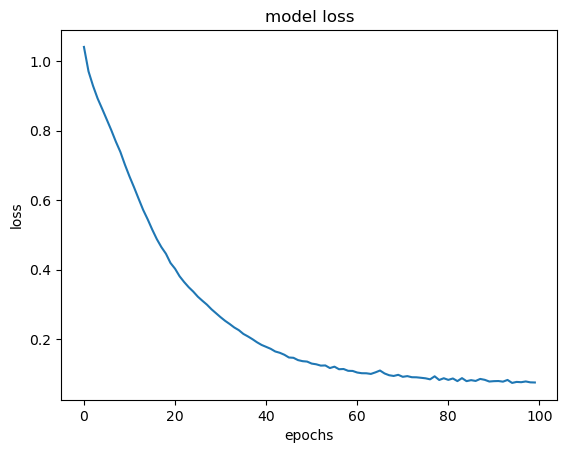

In [13]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

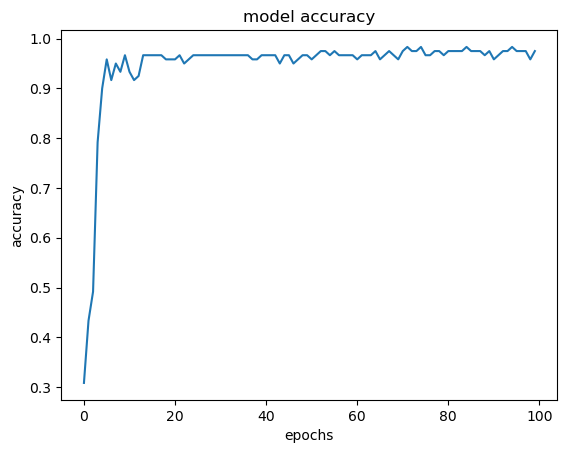

In [14]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.show()

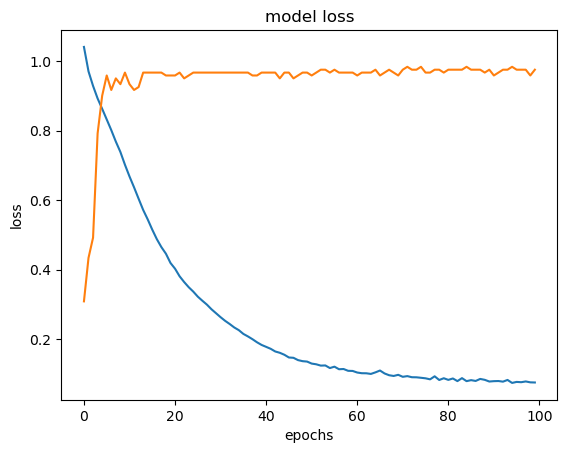

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model Loss & Accuracy')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [16]:
hist.history

{'loss': [1.0405287742614746,
  0.9701985120773315,
  0.9283373951911926,
  0.8922052979469299,
  0.8624227643013,
  0.8318013548851013,
  0.8010636568069458,
  0.7680987119674683,
  0.7382575273513794,
  0.7015257477760315,
  0.6677845120429993,
  0.6365123391151428,
  0.6037153601646423,
  0.5715218782424927,
  0.544197142124176,
  0.514674961566925,
  0.48740121722221375,
  0.4644726514816284,
  0.445416122674942,
  0.41881468892097473,
  0.4023319184780121,
  0.3805310130119324,
  0.3639371991157532,
  0.3490920960903168,
  0.336431086063385,
  0.32184964418411255,
  0.31010064482688904,
  0.29891708493232727,
  0.2855847179889679,
  0.2741723954677582,
  0.26277637481689453,
  0.2522602081298828,
  0.24314256012439728,
  0.23322919011116028,
  0.22548624873161316,
  0.214669868350029,
  0.20744751393795013,
  0.1994476318359375,
  0.19056090712547302,
  0.18295560777187347,
  0.17742156982421875,
  0.17180471122264862,
  0.16411513090133667,
  0.1603379100561142,
  0.1546812057495